FINDINGS

Of the three drugs plus placebo, Capomulin is most effective in tumor response and survival rate.

Of the three drugs, Capomulin is the only one that caused the tumors to shrink.

Of the three drugs, Ketapril performs about as well as a placebo



In [39]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data = pd.read_csv(mouse_drug_data_to_load)
clinical_data = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
drug_data_complete = pd.merge(clinical_data, mouse_data, how="left", on=["Mouse ID", "Mouse ID"])

# filter on the four drugs
drug_data_complete = drug_data_complete[(drug_data_complete.Drug == "Capomulin") |
                                        (drug_data_complete.Drug == "Infubinol") |
                                        (drug_data_complete.Drug == "Ketapril")  |
                                         (drug_data_complete.Drug == "Placebo") ]

# Display the data table for preview

drug_data_complete.head()

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites       Drug
0     b128          0                45.0                 0  Capomulin
1     f932          0                45.0                 0   Ketapril
2     g107          0                45.0                 0   Ketapril
3     a457          0                45.0                 0   Ketapril
4     c819          0                45.0                 0   Ketapril

## Tumor Response to Treatment

In [40]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mean_tumor_response = drug_data_complete.groupby(["Drug","Timepoint"], as_index=False)["Tumor Volume (mm3)"].mean()
mean_tumor_response

# Convert to DataFrame

mean_tumor_response = pd.DataFrame(mean_tumor_response)

# Preview DataFrame
mean_tumor_response.head()


Drug  Timepoint  Tumor Volume (mm3)
0  Capomulin          0           45.000000
1  Capomulin          5           44.266086
2  Capomulin         10           43.084291
3  Capomulin         15           42.064317
4  Capomulin         20           40.716325

In [41]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
standard_error = drug_data_complete.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].sem()

# Convert to DataFrame
standard_error = pd.DataFrame(standard_error)

standard_error = standard_error.rename(columns={"Tumor Volume (mm3)":"Standard Error"})

# Preview DataFrame
standard_error.head()



Standard Error
Drug      Timepoint                
Capomulin 0                0.000000
          5                0.448593
          10               0.702684
          15               0.838617
          20               0.909731

In [42]:
# Minor Data Munging to Re-Format the Data Frames
mean_response_formatted = mean_tumor_response.unstack(level=0)
# Preview that Reformatting worked
mean_response_formatted.head()

Drug  0    Capomulin
      1    Capomulin
      2    Capomulin
      3    Capomulin
      4    Capomulin
dtype: object

In [43]:
x_axis = mean_tumor_response["Timepoint"][(mean_tumor_response.Drug == "Capomulin")].tolist()

capomulin_sem = standard_error.loc["Capomulin"]
capomulin_mean = mean_tumor_response["Tumor Volume (mm3)"][(mean_tumor_response.Drug == "Capomulin")].tolist() 
capomulin_sem = capomulin_sem["Standard Error"].tolist()

infubinol_sem = standard_error.loc["Infubinol"]
infubinol_mean = mean_tumor_response["Tumor Volume (mm3)"][(mean_tumor_response.Drug == "Infubinol")].tolist() 
infubinol_sem = infubinol_sem["Standard Error"].tolist()

ketapril_sem = standard_error.loc["Ketapril"]
ketapril_mean = mean_tumor_response["Tumor Volume (mm3)"][(mean_tumor_response.Drug == "Ketapril")].tolist() 
ketapril_sem = ketapril_sem["Standard Error"].tolist()

placebo_sem = standard_error.loc["Placebo"]
placebo_mean = mean_tumor_response["Tumor Volume (mm3)"][(mean_tumor_response.Drug == "Placebo")].tolist() 
placebo_sem = placebo_sem["Standard Error"].tolist()




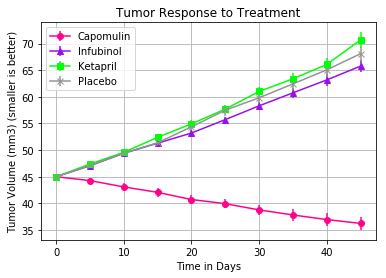

In [44]:
# Generate the Plot (with Error Bars)

fig, ax = plt.subplots()

ax.errorbar(x_axis, capomulin_mean, yerr = capomulin_sem, marker = "o", color='xkcd:hot pink', label="Capomulin")
ax.errorbar(x_axis, infubinol_mean, yerr = infubinol_sem, marker = "^", color='xkcd:violet', label = "Infubinol")
ax.errorbar(x_axis, ketapril_mean, yerr = ketapril_sem, marker = "s", color='xkcd:bright green',label = "Ketapril")
ax.errorbar(x_axis, placebo_mean, yerr = placebo_sem, marker = "x", color='xkcd:grey', label = "Placebo")

plt.ylabel("Tumor Volume (mm3) (smaller is better)")     
plt.xlabel("Time in Days")

plt.legend()
plt.grid()
plt.title("Tumor Response to Treatment")

# Save the Figure
plt.savefig("images/tumor_response.png")


## Metastatic Response to Treatment

In [45]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_metastatic_response = drug_data_complete.groupby(["Drug","Timepoint"], as_index=False)["Metastatic Sites"].mean()
mean_metastatic_response

# Convert to DataFrame

mean_metastatic_response = pd.DataFrame(mean_metastatic_response)

# Preview DataFrame
mean_metastatic_response.head()

Drug  Timepoint  Metastatic Sites
0  Capomulin          0          0.000000
1  Capomulin          5          0.160000
2  Capomulin         10          0.320000
3  Capomulin         15          0.375000
4  Capomulin         20          0.652174

In [46]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
metastatic_standard_error = drug_data_complete.groupby(["Drug","Timepoint"])["Metastatic Sites"].sem()

# Convert to DataFrame
metastatic_standard_error = pd.DataFrame(metastatic_standard_error)

metastatic_standard_error = metastatic_standard_error.rename(columns={"Metastatic Sites":"Metastatic Sites Standard Error"})

# Preview DataFrame
metastatic_standard_error.head()



Metastatic Sites Standard Error
Drug      Timepoint                                 
Capomulin 0                                 0.000000
          5                                 0.074833
          10                                0.125433
          15                                0.132048
          20                                0.161621

In [47]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked
formatted_metastatic_standard_error_df = metastatic_standard_error.unstack(level=0)
formatted_metastatic_standard_error_df.head()


Metastatic Sites Standard Error                              
Drug                            Capomulin Infubinol  Ketapril   Placebo
Timepoint                                                              
0                                0.000000  0.000000  0.000000  0.000000
5                                0.074833  0.091652  0.098100  0.100947
10                               0.125433  0.159364  0.142018  0.115261
15                               0.132048  0.194015  0.191381  0.190221
20                               0.161621  0.234801  0.236680  0.234064

In [48]:
capomulin_metastatic_sem = metastatic_standard_error.loc["Capomulin"]
capomulin_metastatic_mean = mean_metastatic_response["Metastatic Sites"][(mean_metastatic_response.Drug == "Capomulin")].tolist() 
capomulin_metastatic_sem = capomulin_metastatic_sem["Metastatic Sites Standard Error"].tolist()

infubinol_metastatic_sem = metastatic_standard_error.loc["Infubinol"]
infubinol_metastatic_mean = mean_metastatic_response["Metastatic Sites"][(mean_metastatic_response.Drug == "Infubinol")].tolist() 
infubinol_metastatic_sem = infubinol_metastatic_sem["Metastatic Sites Standard Error"].tolist()


ketapril_metastatic_sem = metastatic_standard_error.loc["Ketapril"]
ketapril_metastatic_mean = mean_metastatic_response["Metastatic Sites"][(mean_metastatic_response.Drug == "Ketapril")].tolist() 
ketapril_metastatic_sem = ketapril_metastatic_sem["Metastatic Sites Standard Error"].tolist()

placebo_metastatic_sem = metastatic_standard_error.loc["Placebo"]
placebo_metastatic_mean = mean_metastatic_response["Metastatic Sites"][(mean_metastatic_response.Drug == "Placebo")].tolist() 
placebo_metastatic_sem = placebo_metastatic_sem["Metastatic Sites Standard Error"].tolist()


In [49]:
# Generate the Plot (with Error Bars)

# Save the Figure

# Show the Figure


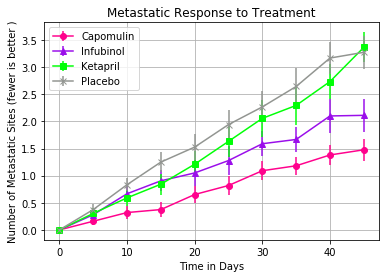

In [50]:
fig, ax = plt.subplots()

ax.errorbar(x_axis, capomulin_metastatic_mean, yerr = capomulin_metastatic_sem, marker = "o", color='xkcd:hot pink', label="Capomulin")
ax.errorbar(x_axis, infubinol_metastatic_mean, yerr = infubinol_metastatic_sem, marker = "^", color='xkcd:violet', label = "Infubinol")
ax.errorbar(x_axis, ketapril_metastatic_mean, yerr = ketapril_metastatic_sem, marker = "s", color='xkcd:bright green', label = "Ketapril")
ax.errorbar(x_axis, placebo_metastatic_mean, yerr = placebo_metastatic_sem, marker = "x", color='xkcd:grey', label = "Placebo")

plt.ylabel("Number of Metastatic Sites (fewer is better )")     
plt.xlabel("Time in Days")

plt.legend()
plt.grid()
plt.title("Metastatic Response to Treatment")

# Save the Figure

plt.savefig("images/metastatic_response.png")


## Survival Rates

In [51]:
# Store the Count of Mice Grouped by Drug and Timepoint
mouse_count_by_time = drug_data_complete.groupby(["Drug","Timepoint"], as_index=True)["Mouse ID"].count()
mouse_count_by_time

# Convert to DataFrame

mouse_count_by_time = pd.DataFrame(mouse_count_by_time)
mouse_count_by_time =mouse_count_by_time.rename(columns={"Mouse ID":"Mouse Count"})



# Preview DataFrame
mouse_count_by_time.head()



Mouse Count
Drug      Timepoint             
Capomulin 0                   25
          5                   25
          10                  25
          15                  24
          20                  23

In [52]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame


In [53]:
formatted_mouse_count_df = mouse_count_by_time.unstack(level=0)
formatted_mouse_count_df = formatted_mouse_count_df.loc[:, "Mouse Count"]
formatted_mouse_count_df


Drug       Capomulin  Infubinol  Ketapril  Placebo
Timepoint                                         
0                 25         25        25       25
5                 25         25        23       24
10                25         21        22       24
15                24         21        19       20
20                23         20        19       19
25                22         18        19       17
30                22         17        18       15
35                22         12        17       14
40                21         10        15       12
45                21          9        11       11

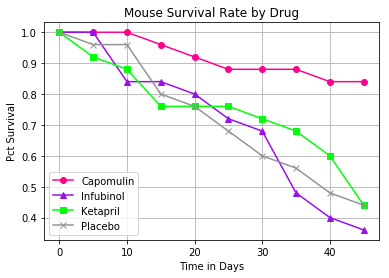

In [54]:
# Generate the Plot (Accounting for percentages)

capomulin_mouse_count = (formatted_mouse_count_df.loc[:, "Capomulin"]/formatted_mouse_count_df.loc[:, "Capomulin"][0]).tolist()
plt.plot(x_axis, capomulin_mouse_count, marker="o", color='xkcd:hot pink', label="Capomulin")

infubinol_mouse_count = (formatted_mouse_count_df.loc[:, "Infubinol"]/formatted_mouse_count_df.loc[:, "Infubinol"][0]).tolist()
plt.plot(x_axis, infubinol_mouse_count, marker="^", color='xkcd:violet', label="Infubinol")

ketapril_mouse_count = (formatted_mouse_count_df.loc[:, "Ketapril"]/formatted_mouse_count_df.loc[:, "Ketapril"][0]).tolist()
plt.plot(x_axis, ketapril_mouse_count, marker="s", color='xkcd:bright green', label="Ketapril")

placebo_mouse_count = (formatted_mouse_count_df.loc[:, "Placebo"]/formatted_mouse_count_df.loc[:, "Placebo"][0]).tolist()
plt.plot(x_axis, placebo_mouse_count, marker="x", color='xkcd:grey', label="Placebo")

plt.ylabel("Pct Survival")     
plt.xlabel("Time in Days")

plt.title("Mouse Survival Rate by Drug")
plt.legend()
plt.grid()

# Save the Figure
plt.savefig("images/mouse_survival.png")

# Show the Figure


## Summary Bar Graph

In [55]:
# Calculate the percent changes for each drug

# Display the data to confirm


In [56]:
pct_tumor_response = drug_data_complete.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].mean()
pct_tumor_response = pd.DataFrame(pct_tumor_response)
pct_tumor_response = pct_tumor_response.unstack(level=0).loc[:, "Tumor Volume (mm3)"]

capumulin_response = (pct_tumor_response.loc[:, "Capomulin"][45]/pct_tumor_response.loc[:, "Capomulin"][0])*100 - 100
infubinol_response = (pct_tumor_response.loc[:, "Infubinol"][45]/pct_tumor_response.loc[:, "Infubinol"][0])*100 - 100
ketapril_response = (pct_tumor_response.loc[:, "Ketapril"][45]/pct_tumor_response.loc[:, "Ketapril"][0])*100 - 100
placebo_response = (pct_tumor_response.loc[:, "Placebo"][45]/pct_tumor_response.loc[:, "Placebo"][0])*100 - 100

pct_tumor_response_df = pd.DataFrame({
                                    "Drug": ["Capomulin", "Infubinol", "Ketapril", "Placebo" ],
                                    "Percent Change":[capumulin_response, infubinol_response, ketapril_response, placebo_response]
                                    })

pct_tumor_response_df



Drug  Percent Change
0  Capomulin      -19.475303
1  Infubinol       46.123472
2   Ketapril       57.028795
3    Placebo       51.297960

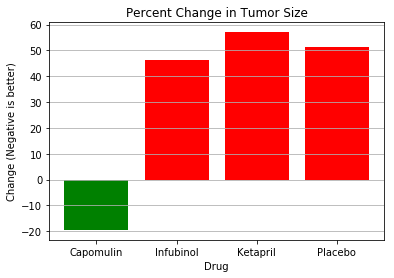

In [57]:
colors = []
for value in pct_tumor_response_df["Percent Change"].tolist():
    if value >= 0:
        colors.append('r')
    else:
        colors.append('g')
        
plt.ylabel("Change (Negative is better)")     
plt.xlabel("Drug")
plt.title("Percent Change in Tumor Size")
plt.bar(pct_tumor_response_df["Drug"].tolist(), pct_tumor_response_df["Percent Change"].tolist(), color=colors)
plt.grid(axis="y")

plt.savefig("images/tumor_percent_change.png")
